In [3]:
from google.colab import files

# Upload the .tar file
uploaded = files.upload()

Saving aerofit_treadmill_data.csv to aerofit_treadmill_data.csv


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes = True)
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('aerofit_treadmill_data.csv')

df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [5]:
df.shape

(180, 9)

In [6]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [7]:
df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [8]:
df['Product'] = df['Product'].astype('category')
df['Gender'] = df['Gender'].astype('category')
df['MaritalStatus'] = df['MaritalStatus'].astype('category')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(3), int64(6)
memory usage: 9.5 KB


In [10]:
df.skew()

Age          0.982161
Education    0.622294
Usage        0.739494
Fitness      0.454800
Income       1.291785
Miles        1.724497
dtype: float64

In [11]:
df.describe(include = 'all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


In [12]:
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

## Observations



- There are no missing values.
- There are 3 unique `products` in the dataset.
- `KP281` is the most frequent product.
- The mean age is `28.78` and the min & max goes from `18-50` years old. And 75% have an age less or equal `33`.
- The mean education is around `16` years, and 75% of the persons are having less or equal to 16.
- There are 104 `males`, and 76 `females`




# Analysis

In [13]:
df['Product'].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

In [14]:
df['Product'].unique()

['KP281', 'KP481', 'KP781']
Categories (3, object): ['KP281', 'KP481', 'KP781']

In [15]:
df['Gender'].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

In [16]:
df['MaritalStatus'].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

In [17]:
df['Age'].unique()

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 43, 44, 46, 47, 50, 45, 48, 42])

In [18]:
df['Fitness'].unique()

array([4, 3, 2, 1, 5])

# Graphical Analysis

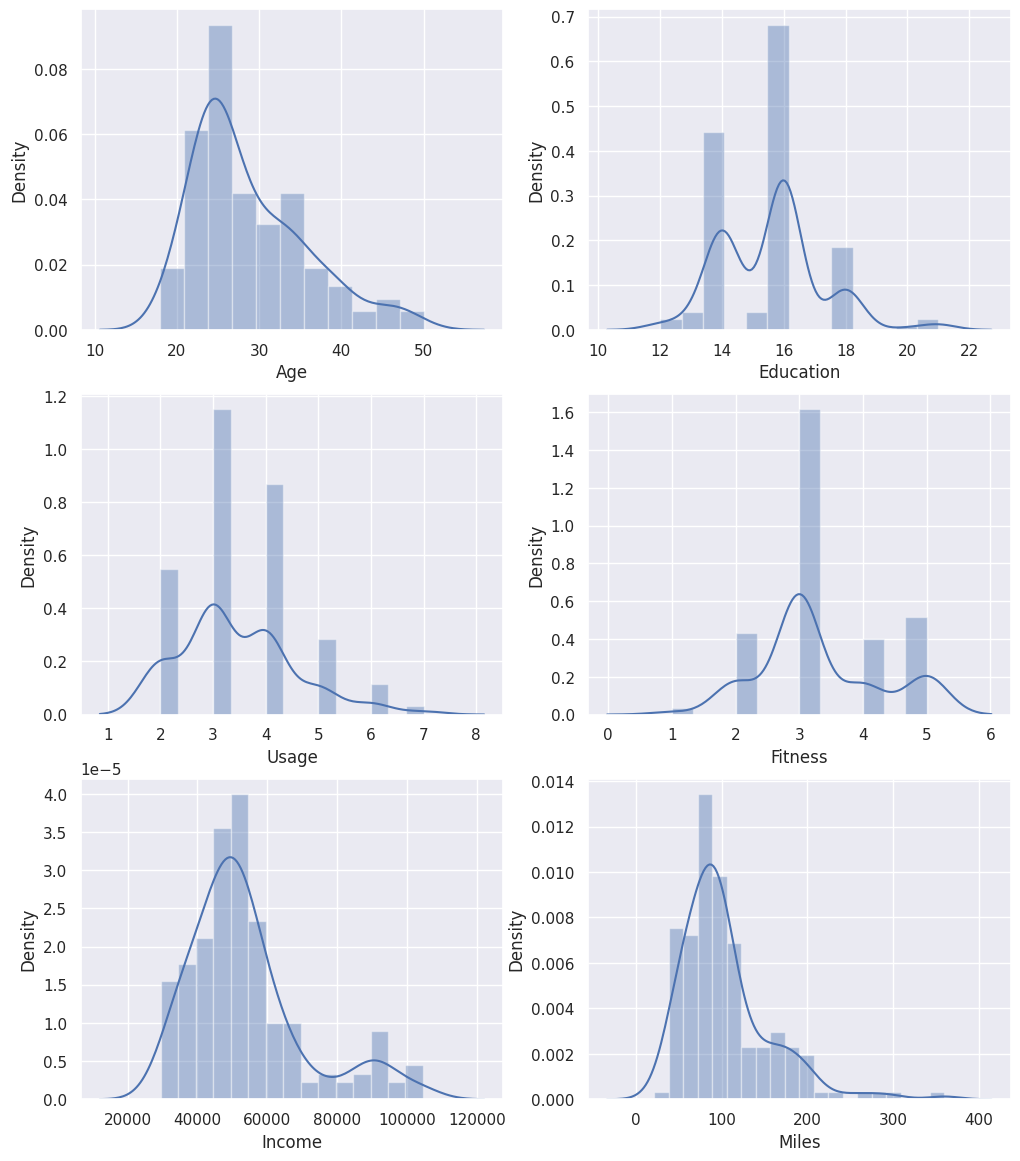

In [19]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.2)

sns.distplot(df['Age'], kde=True, ax=axis[0,0])
sns.distplot(df['Education'], kde=True, ax=axis[0,1])
sns.distplot(df['Usage'], kde=True, ax=axis[1,0])
sns.distplot(df['Fitness'], kde=True, ax=axis[1,1])
sns.distplot(df['Income'], kde=True, ax=axis[2,0])
sns.distplot(df['Miles'], kde=True, ax=axis[2,1])
plt.show()

# Observations

- `Miles` and `Income` have outliers.
- Huge amount of fitness level 3.
- `Income` customers fall `45,000 - 60,000`  range


# Count Plots

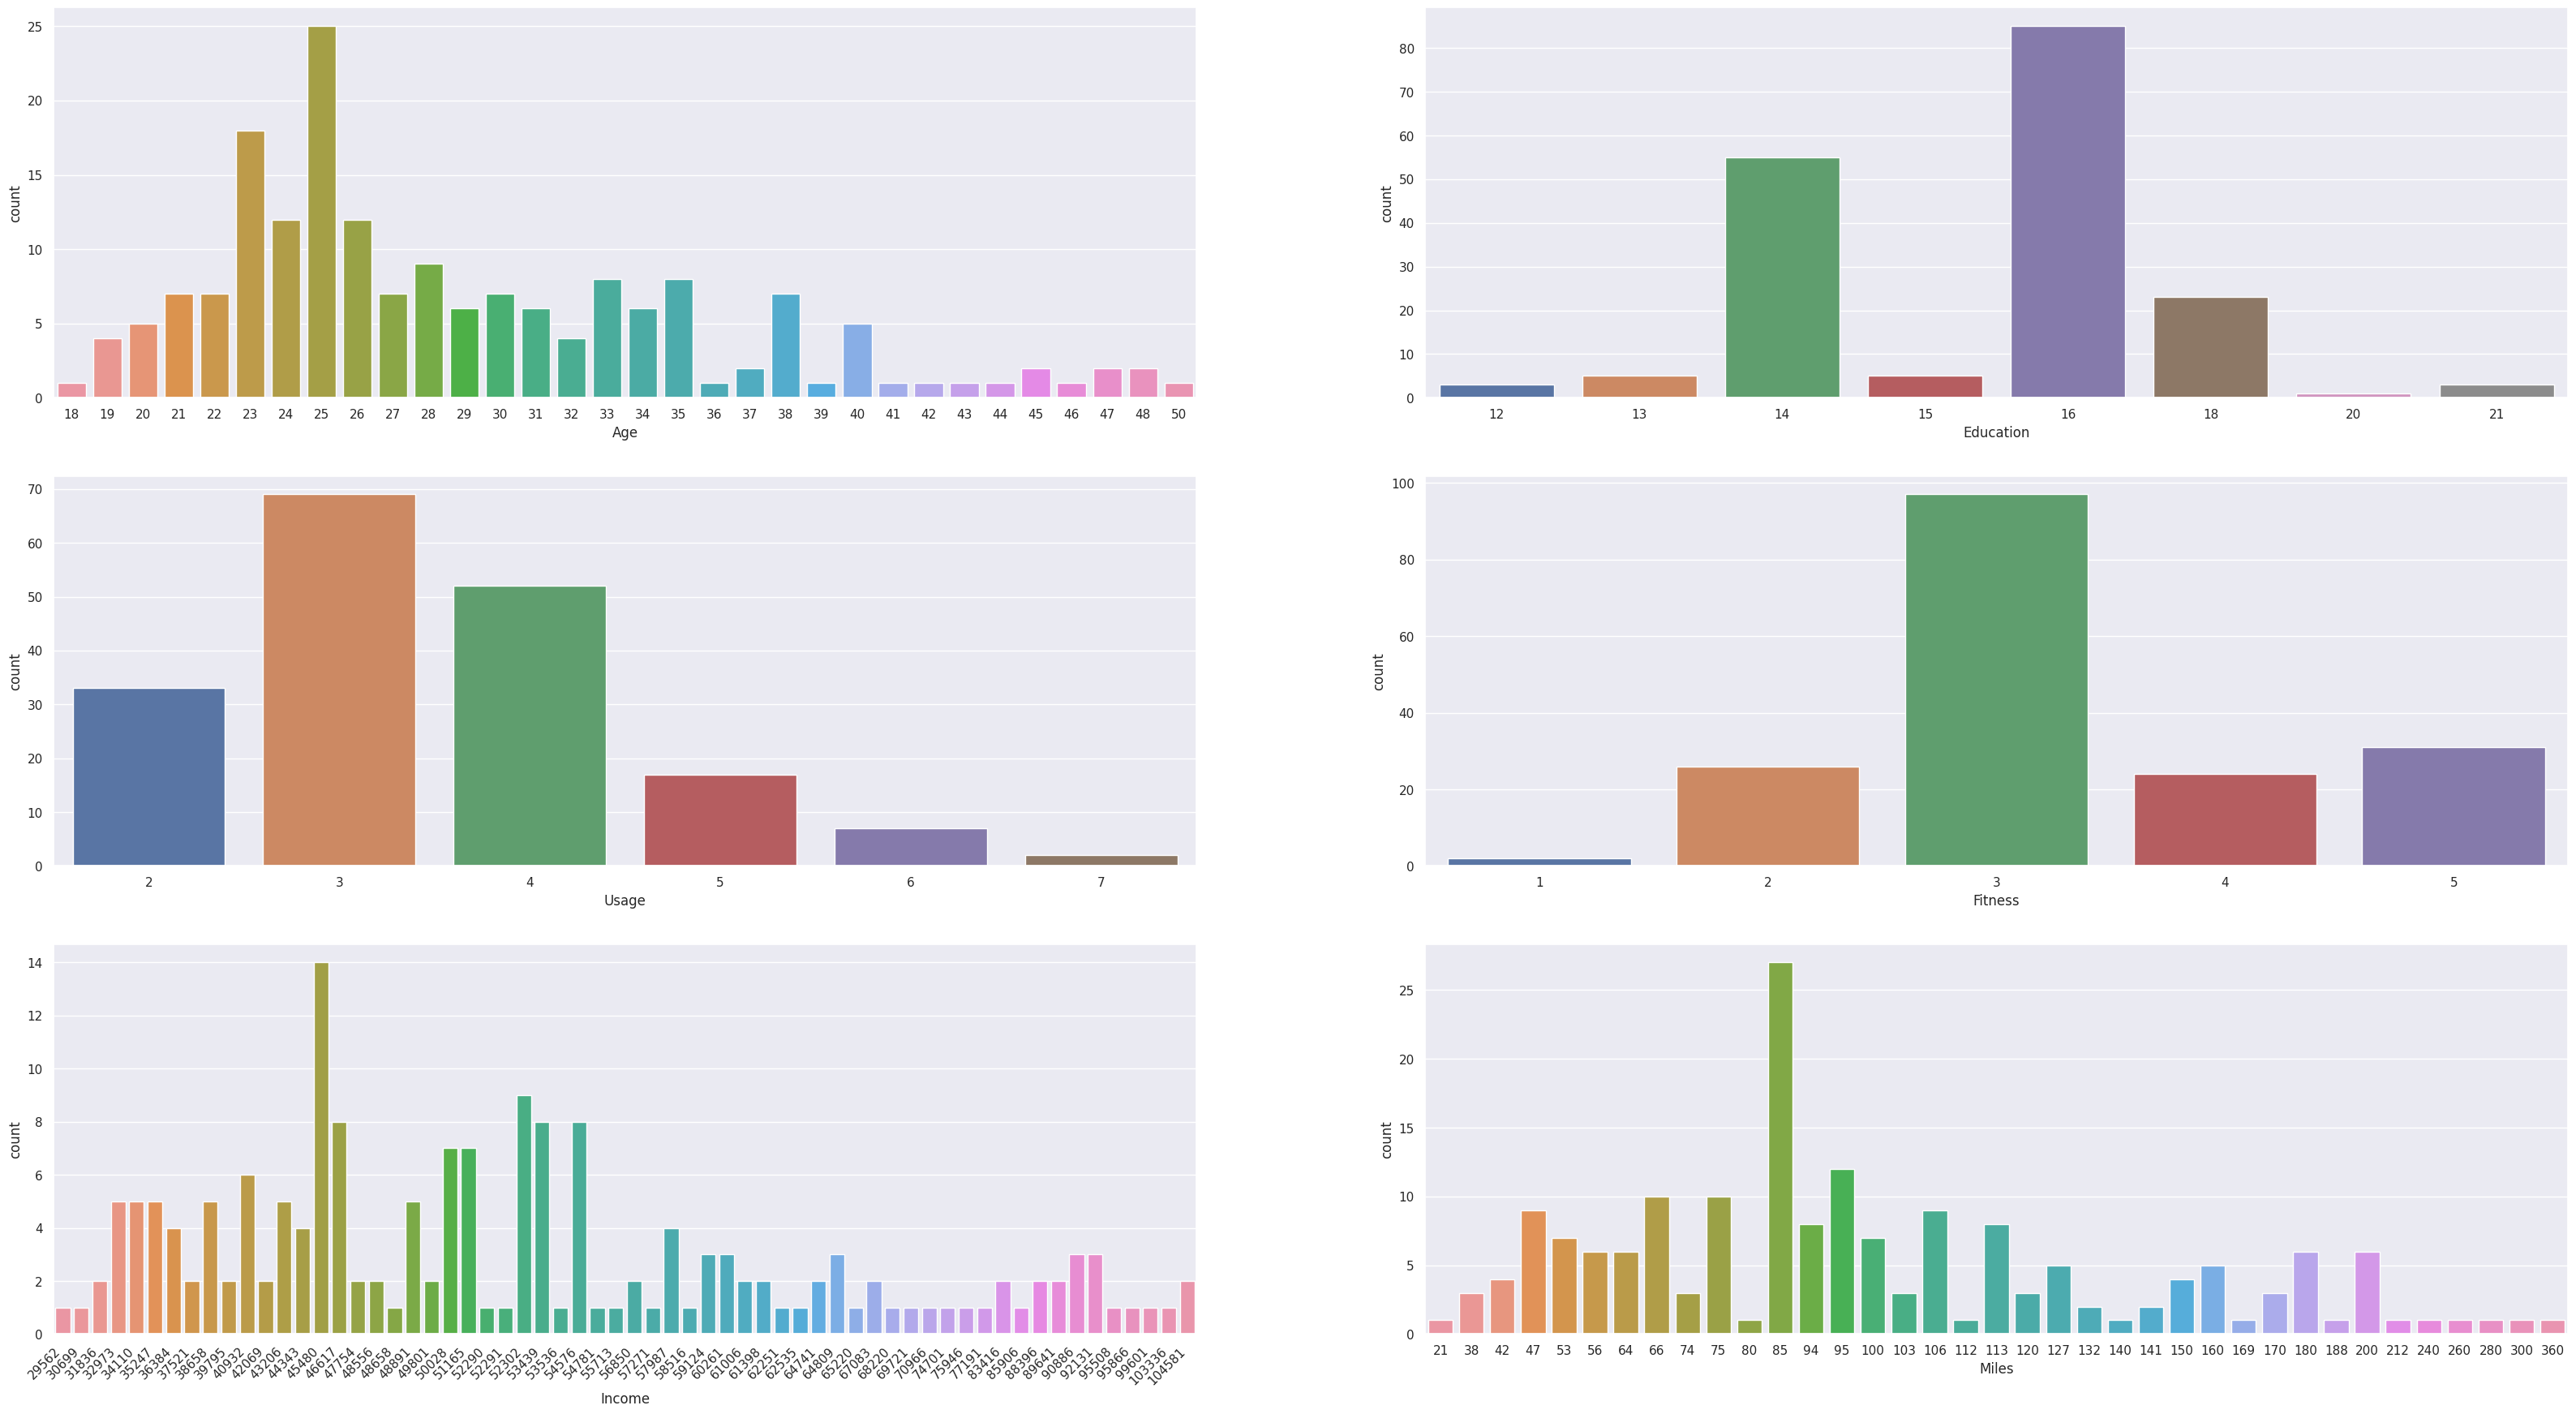

In [20]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(40, 15))
fig.subplots_adjust(top=1.2)

sns.countplot(data = df, x='Age', ax=axis[0,0])
sns.countplot(data = df, x = 'Education', ax=axis[0,1])
sns.countplot(data = df,x = 'Usage', ax=axis[1,0])
sns.countplot(data = df,x= 'Fitness',ax=axis[1,1])
sns.countplot(data = df,x='Income',  ax=axis[2,0])
axis[2, 0].set_xticklabels(axis[2, 0].get_xticklabels(), rotation=45, ha='right')
sns.countplot(data = df,x='Miles',  ax=axis[2,1])
plt.show()

# Observations

- Majority of people are **23** and **25** years old.
- A good amount of people are level **3** under fitness.
- Income and Miles have outliers

## Box Plot

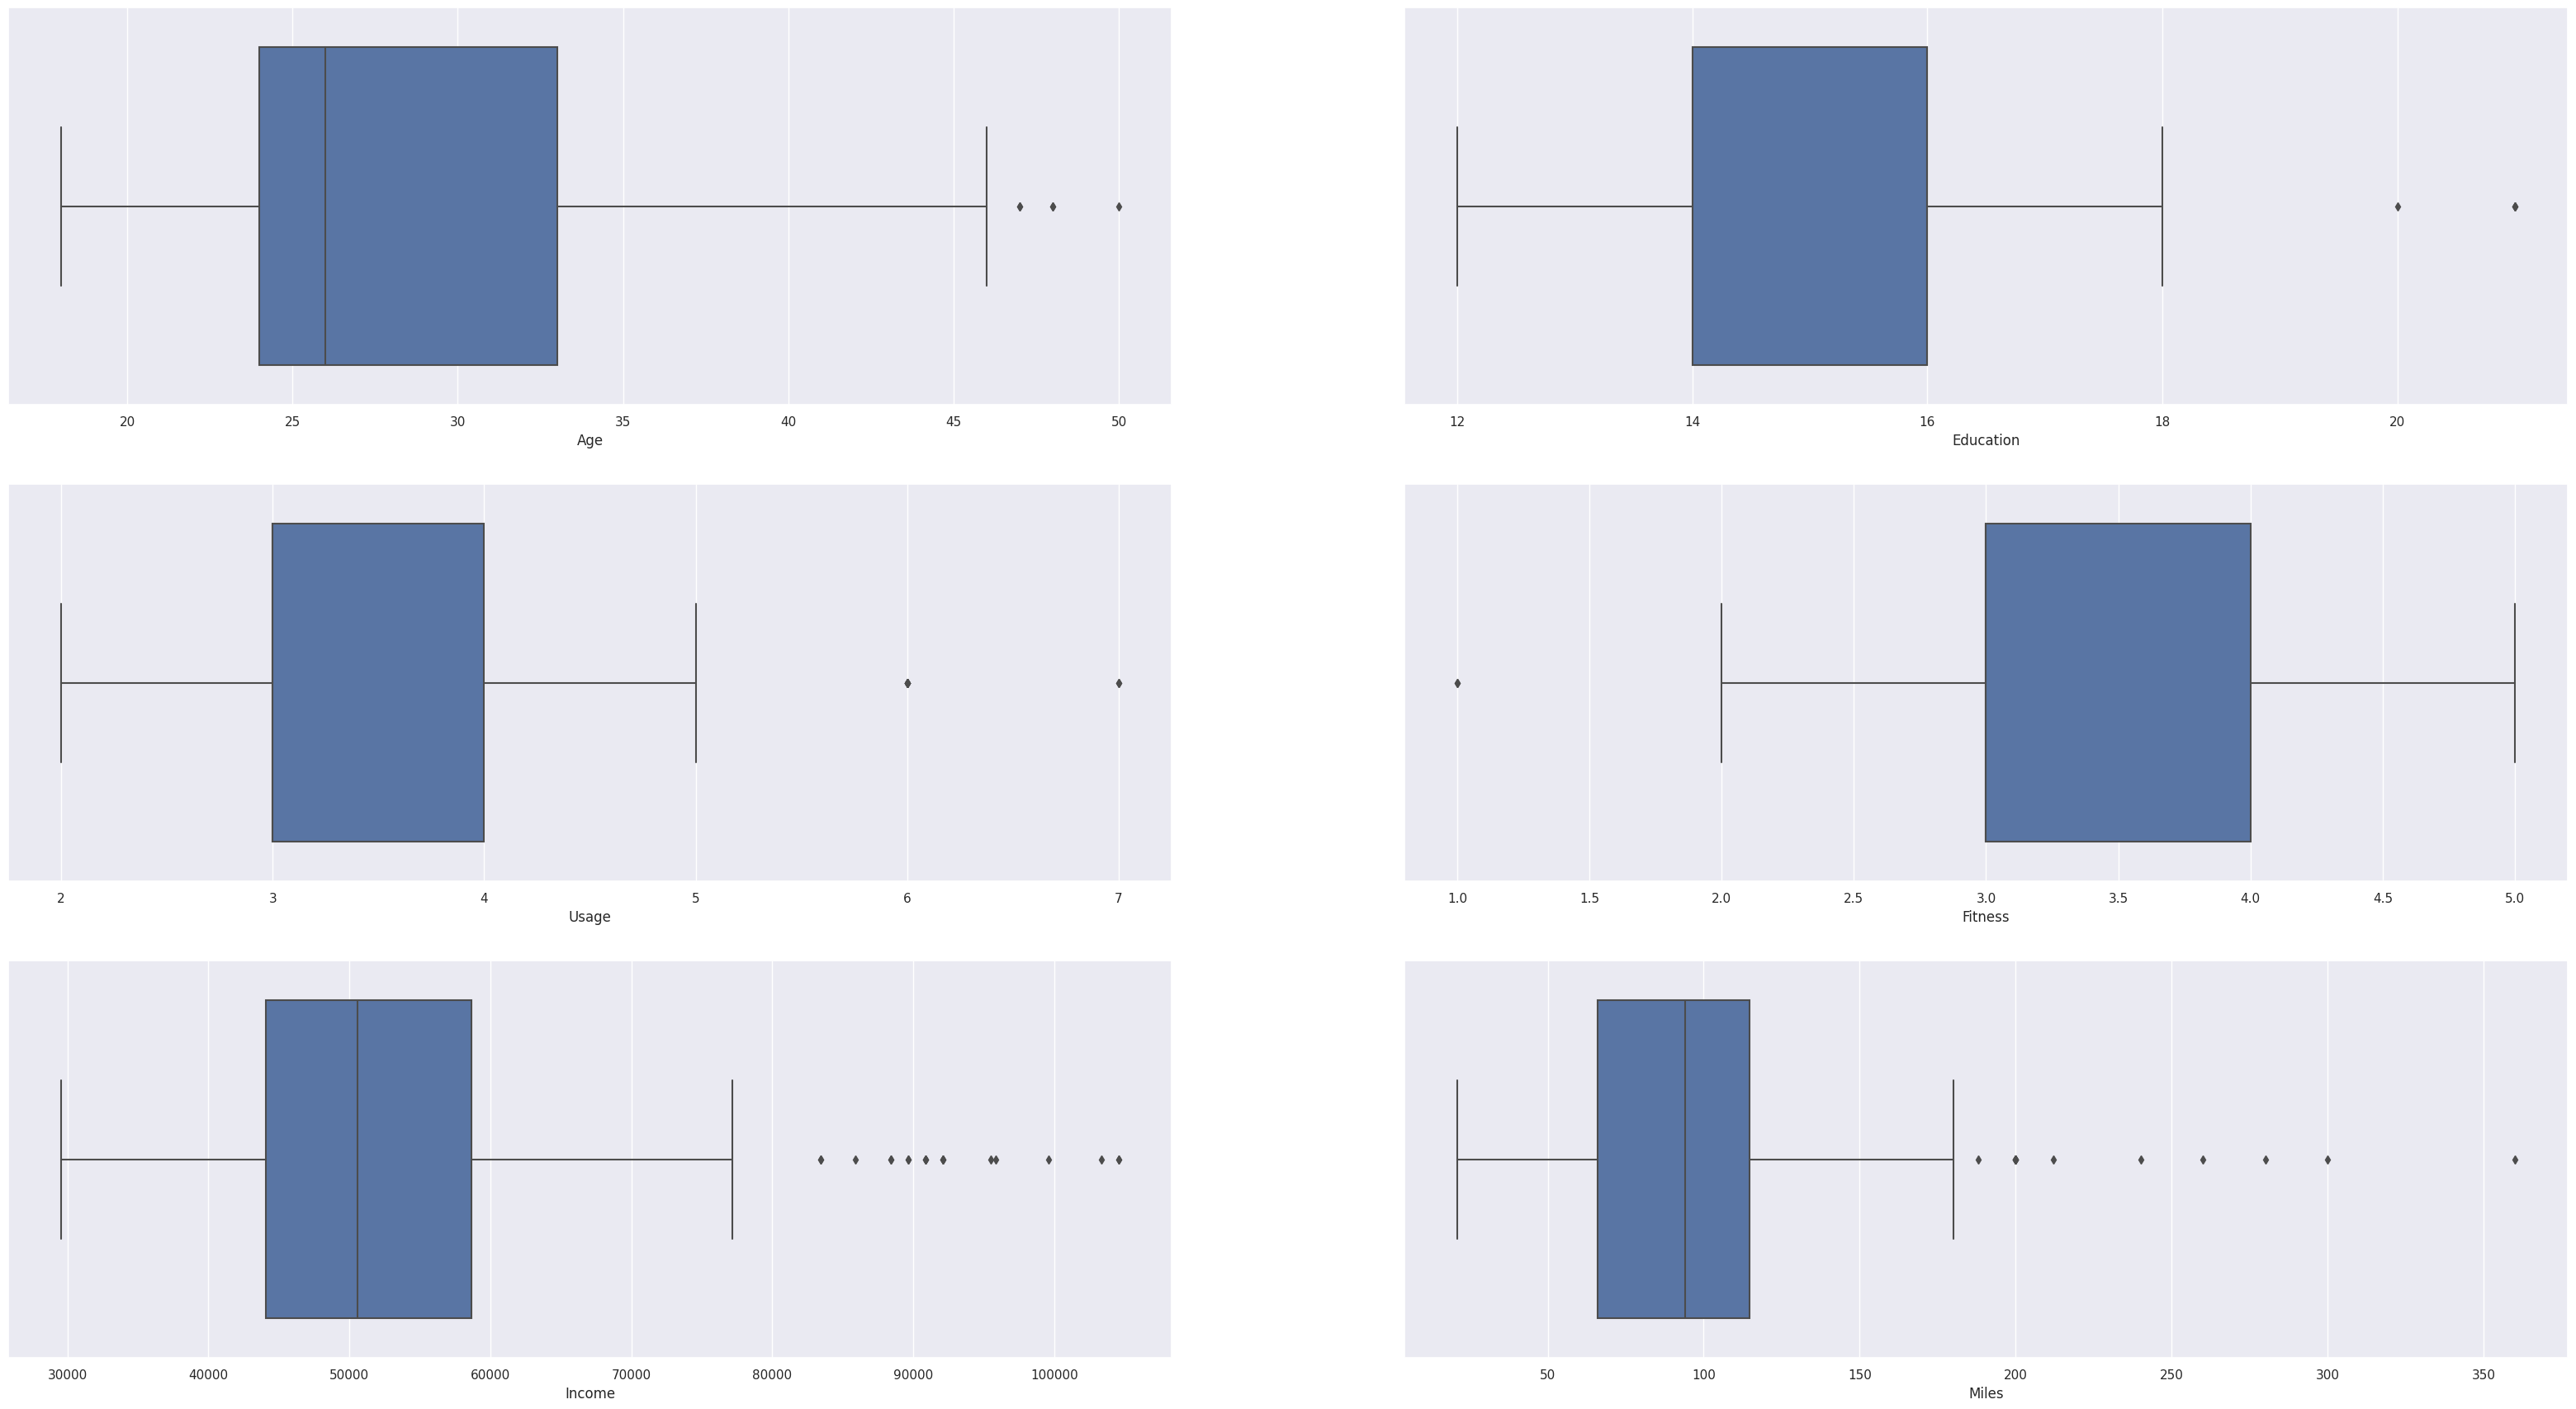

In [21]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(40, 15))
fig.subplots_adjust(top=1.2)

sns.boxplot(data = df, x='Age', ax=axis[0,0])
sns.boxplot(data = df, x = 'Education', ax=axis[0,1])
sns.boxplot(data = df,x = 'Usage', ax=axis[1,0])
sns.boxplot(data = df,x= 'Fitness',ax=axis[1,1])
sns.boxplot(data = df,x='Income',  ax=axis[2,0])
# axis[2, 0].set_xticklabels(axis[2, 0].get_xticklabels(), rotation=45, ha='right')
sns.boxplot(data = df,x='Miles',  ax=axis[2,1])
plt.show()

Text(0.5, 1.0, 'Marital Status - Count')

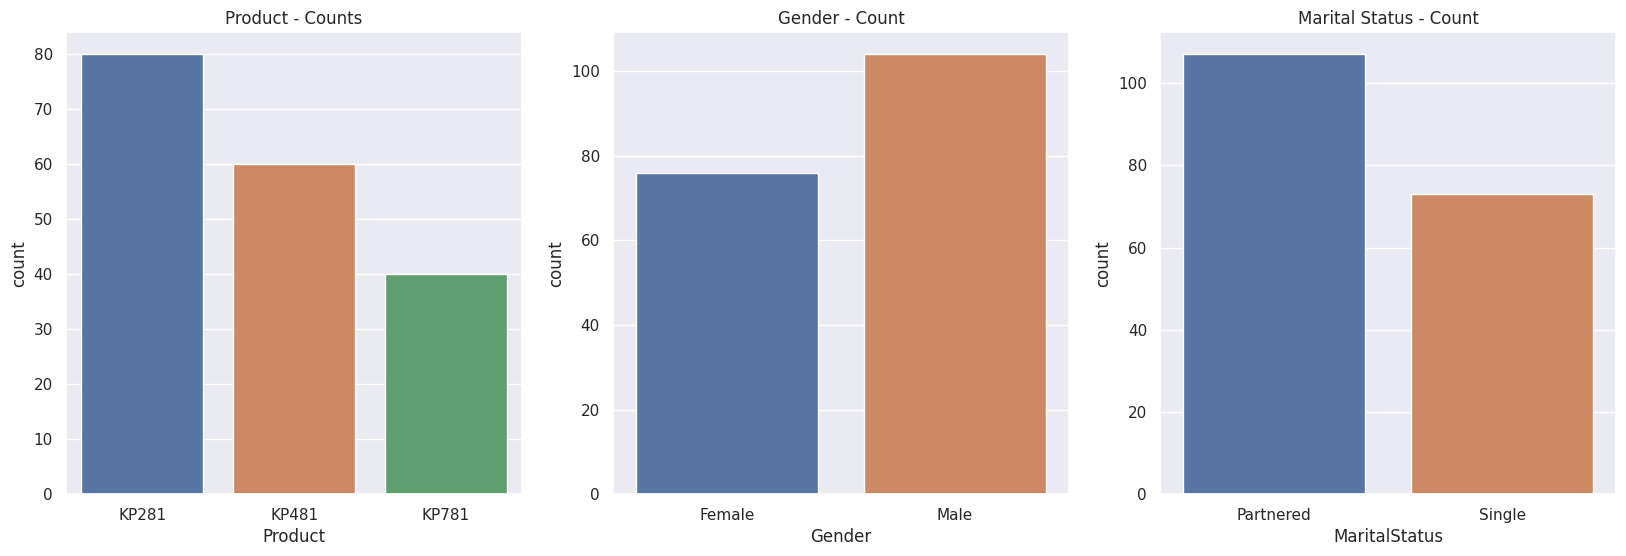

In [22]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))
sns.countplot(data = df, x = 'Product',ax=axs[0])
sns.countplot(data = df, x = 'Gender',ax=axs[1])
sns.countplot(data = df, x = 'MaritalStatus',ax=axs[2])

axs[0].set_title('Product - Counts')
axs[1].set_title('Gender - Count')
axs[2].set_title('Marital Status - Count')

# Observations

- `KP281` is the most popular prodcut.
- `Males` are using more treadmills.
- `Partners` are more likely to buy a treadmill.

Text(0.5, 1.0, 'Product x Age')

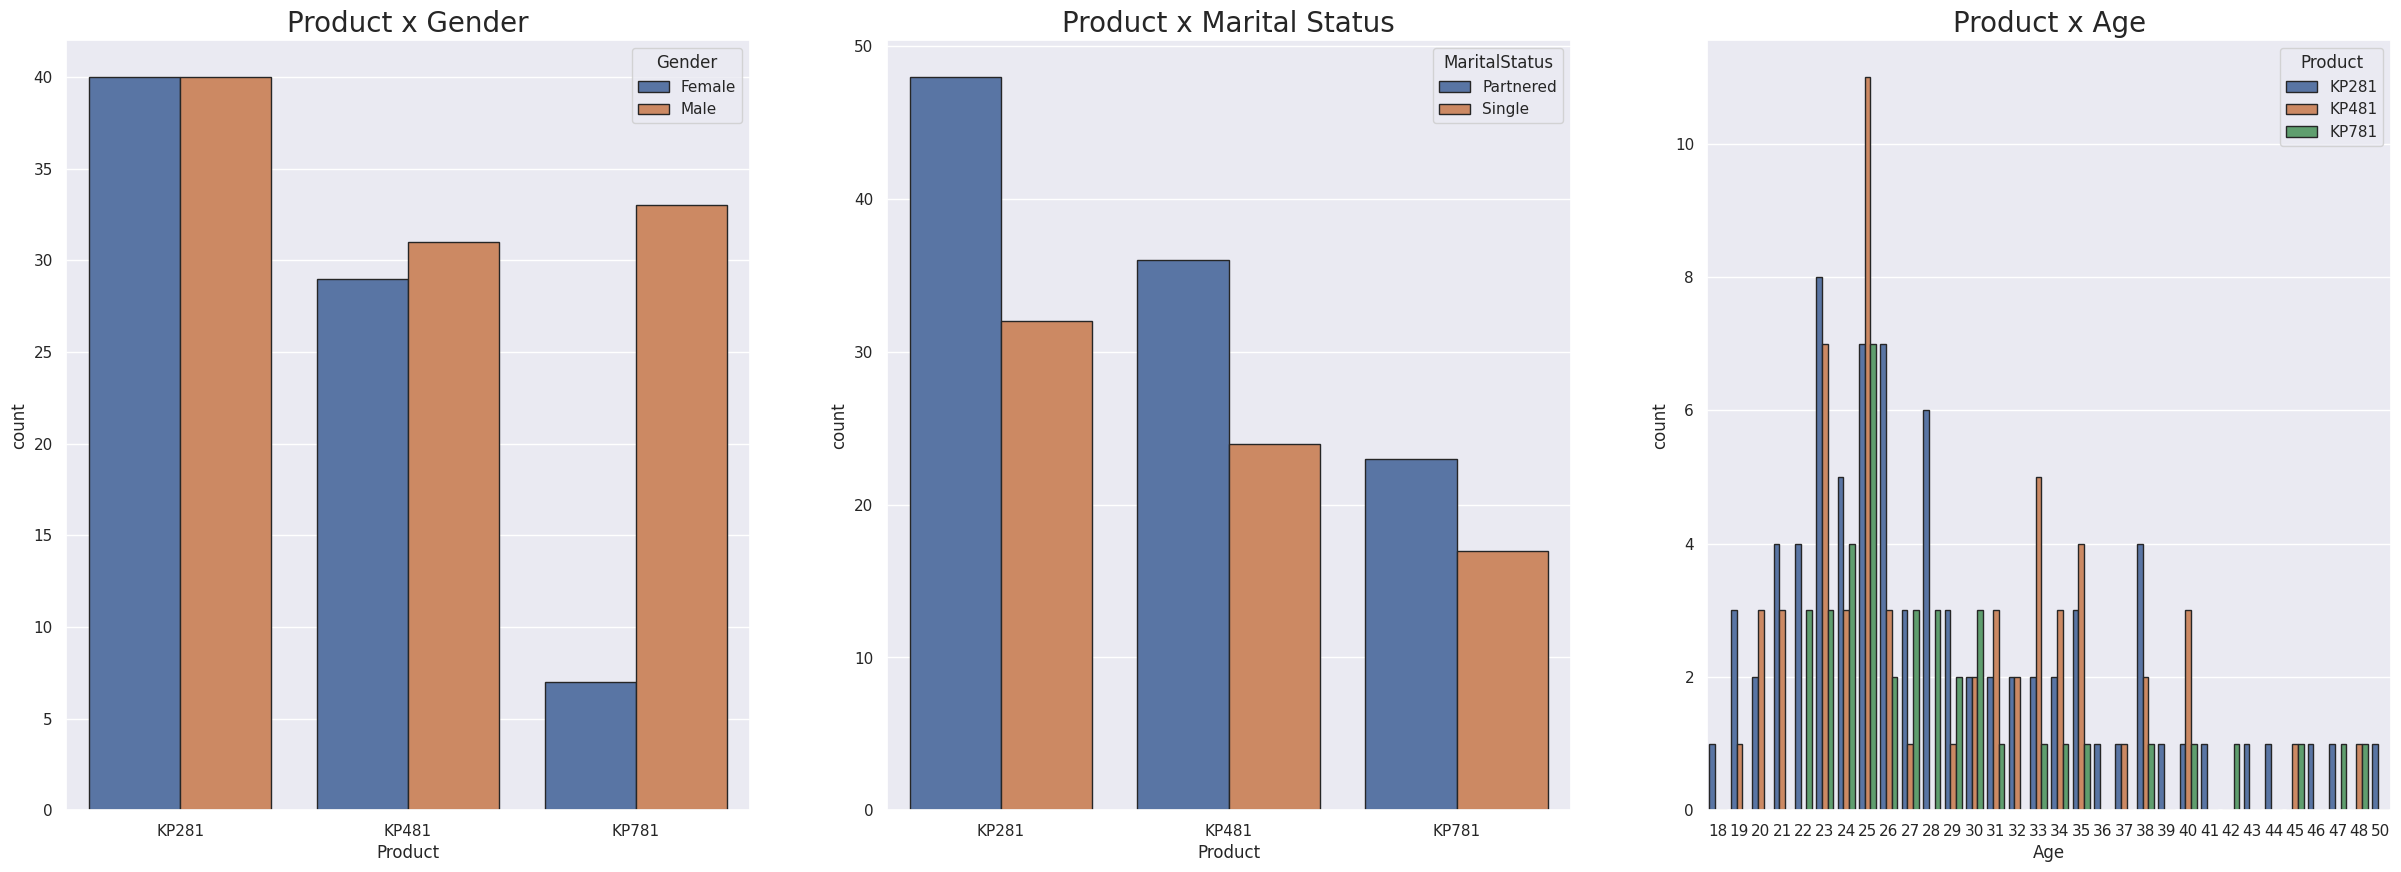

In [23]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(30, 10))
sns.countplot(data=df, x='Product', hue='Gender', edgecolor="0.15", ax=axs[0])
sns.countplot(data=df, x='Product', hue='MaritalStatus', edgecolor="0.15", ax=axs[1])
sns.countplot(data=df, x='Age', hue='Product', edgecolor="0.15", ax=axs[2])
axs[0].set_title('Product x Gender', fontsize=20)
axs[1].set_title('Product x Marital Status', fontsize=20)
axs[2].set_title('Product x Age',fontsize=20)

# Observations

**Product x Gender**
- The same amount of males and females have purchased **KP281**
- More males buy the products, **KP481** and **KP781**

**Product x Marital Status**
- Customer who is a **partner** is more likely to buy any of the 3 products

**Product x Age**
- Customers that are 25 are very likely to buy the product **KP481**

# Mutivariate Analysis

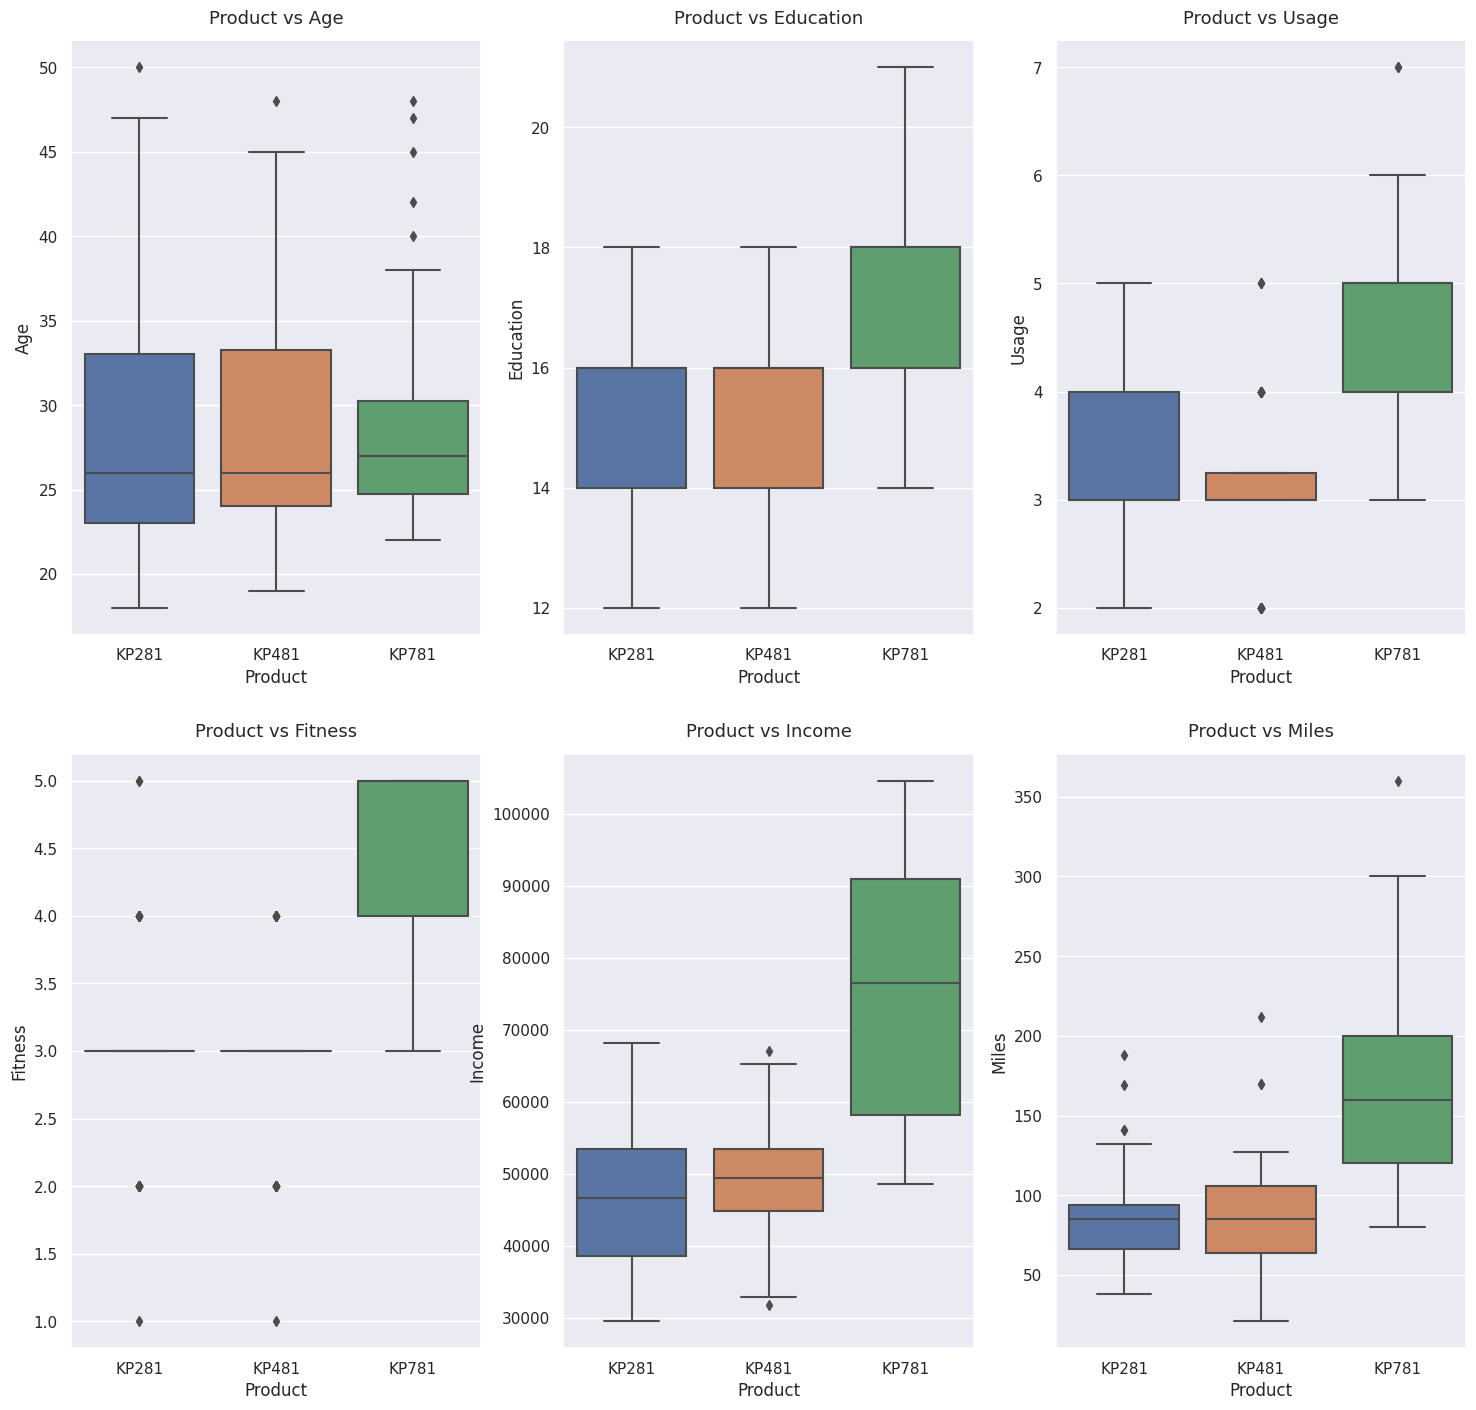

In [24]:
attributes = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
sns.set(color_codes = True)
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
fig.subplots_adjust(top=1.2)
count = 0
for i in range(2):
    for j in range(3):
        sns.boxplot(data=df, x='Product', y=attributes[count], ax=axs[i,j])
        axs[i,j].set_title(f"Product vs {attributes[count]}", pad=12, fontsize=13)
        count += 1

# Observations

**Product vs Age**
- Customers purchasing products `KP281 & KP481` are having **same Age median** value.
- Customers whose age lies between `25-30`, are more likely to buy the **KP781** product.

**Product vs Education**
- Customers whose Education is `greater than 16`, have more chances to purchase the **KP781** product.
- While the customers with Education `less than 16` have equal chances of purchasing **KP281 or KP481**.

**Product vs Usage**
- Customers who are planning to use the treadmill `greater than 4 times` a week, are more likely to purchase the **KP781** product.
- While the other customers are likely to purchase KP281 or KP481.

**Product vs Fitness**
- The more the customer is fit `(fitness >= 3)`, the higher the chances of the customer purchasing the **KP781** product.

**Product vs Income**
- The `higher the Income` of the customer (Income >= 60000), the higher the chances of the customer purchasing the **KP781** product.
**Product vs Miles**
- If the customer expects to `walk/run greater than 120 Miles per week`, it is more likely that the customer will buy the KP781 product.

# Correlation Analysis

In [25]:
df.cov()

,Age,Education,Usage,Fitness,Income,Miles
Age,48.212166,3.149410,0.113470,0.406828,5.884446e+04,13.186530
Education,3.149410,2.614867,0.693172,0.636623,1.670472e+04,25.770795
Usage,0.113470,0.693172,1.176785,0.695469,9.303043e+03,42.709808
Fitness,0.406828,0.636623,0.695469,0.919429,8.467925e+03,39.073246
Income,58844.463439,16704.717815,9303.042582,8467.925388,2.724706e+08,465265.361887
Miles,13.186530,25.770795,42.709808,39.073246,4.652654e+05,2689.833489


In [26]:
df.corr()

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


<Axes: >

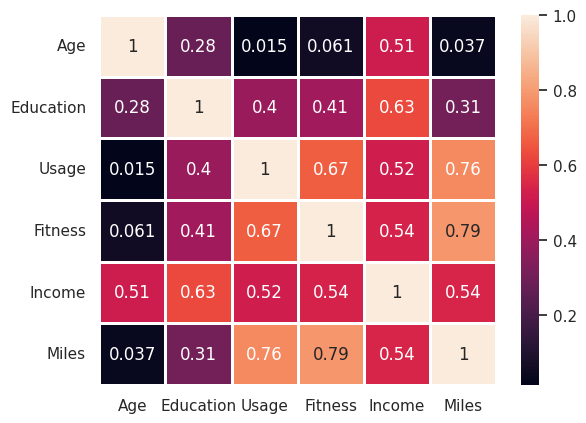

In [27]:
sns.heatmap(df.corr(),annot=True, linewidths=1)

# Observations

- `Miles & Usage` and `Miles & Fitness` are highly correlated. Which means, the higher the customer's fitness level the more they will use the treadmill.
- `Income & Education` shows a strong correlation.


In [38]:
df1 = df[['Product','Gender','MaritalStatus']].melt()
df_prop = (df1.groupby(['variable','value'])[['value']].count() / len(df)).mul(100).round(2).astype(str) + '%'
df_prop

value
variable      value            
Gender        Female     42.22%
              Male       57.78%
MaritalStatus Partnered  59.44%
              Single     40.56%
Product       KP281      44.44%
              KP481      33.33%
              KP781      22.22%

In [ ]:
%reset_selective

# Observations

**Gender**
- 57.78% of customers are **male**

**Marital Status**
- 59.44% of customers have a **partner**

**Product**
- 44.44% of customers purchased model KP281
- 33.33% of customers purchased model KP481
- 22.22% of customers purchased model KP781

# Probability by Product x Gender

In [43]:
prod_gen = pd.crosstab(index = df['Product'],columns = [df['Gender']], margins = True, margins_name = 'Total')
prod_gen

Gender,Female,Male,Total
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
Total,76,104,180


In [59]:
prop_male_pct = round((prod_gen['Male']['Total'] / prod_gen['Total']['Total']), 4) * 100
prop_male_pct

57.78

In [60]:
prop_female_pct = round((prod_gen['Female']['Total'] / prod_gen['Total']['Total']), 4) * 100
prop_female_pct

42.22

In [63]:
prop_female_481 = round((prod_gen['Female']['KP481'] / prod_gen['Total']['KP481']), 4) * 100
prop_female_481

48.33

In [65]:
prop_male_781 = round((prod_gen['Male']['KP781'] / prod_gen['Total']['KP781']), 4) * 100
prop_male_781

82.5

# Probability Product x Age

In [66]:
df2 = df.copy()

In [70]:
# Use cut when you need to segment and sort data values into bins. This
# function is also useful for going from a continuous variable to a
# categorical variable. For example, cut could convert ages to groups of
# age ranges.


#df2['Age'].describe()

bins = [12,20,30,40,60]
labels = ['Teens','20s','30s','Above 40s']
df2['GroupAge'] = pd.cut(df['Age'],bins)
df2['CategoryAge'] = pd.cut(df['Age'],bins,labels=labels)
df2.tail()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,GroupAge,CategoryAge
175,KP781,40,Male,21,Single,6,5,83416,200,"(30, 40]",30s
176,KP781,42,Male,18,Single,5,4,89641,200,"(40, 60]",Above 40s
177,KP781,45,Male,16,Single,5,5,90886,160,"(40, 60]",Above 40s
178,KP781,47,Male,18,Partnered,4,5,104581,120,"(40, 60]",Above 40s
179,KP781,48,Male,18,Partnered,4,5,95508,180,"(40, 60]",Above 40s


In [72]:
prod_age = pd.crosstab(index = df2['Product'],columns = [df2['CategoryAge']], margins = True, margins_name = 'Total')
prod_age

CategoryAge,Teens,20s,30s,Above 40s,Total
Product,,,,,
KP281,6,49,19,6,80
KP481,4,31,23,2,60
KP781,0,30,6,4,40
Total,10,110,48,12,180


In [73]:
prop_20_pct = round((prod_age['20s']['Total'] / prod_age['Total']['Total']), 4) * 100
prop_20_pct

61.11

# Observations

- `61.11%` of the customers are between **20 - 30** years old.
- `Teens` do not buy much, and they definnetely do not buy `KP781` (it could be due to income)

# Product x Income

In [74]:
df3 = df.copy()

In [83]:
# df3['Income'].describe()

bins_inc = [29000,35000,55000,85000,105000]
labels_inc = ['Low Income','Lower-Middle Income','Upper-Middle Income','High Income']
df3['CategoryIncome'] = pd.cut(df3['Income'],bins=bins_inc,labels=labels_inc)
df3.tail()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,CategoryIncome
175,KP781,40,Male,21,Single,6,5,83416,200,Upper-Middle Income
176,KP781,42,Male,18,Single,5,4,89641,200,High Income
177,KP781,45,Male,16,Single,5,5,90886,160,High Income
178,KP781,47,Male,18,Partnered,4,5,104581,120,High Income
179,KP781,48,Male,18,Partnered,4,5,95508,180,High Income


In [84]:
prod_inc = pd.crosstab(index = df3['Product'],columns = [df3['CategoryIncome']], margins = True, margins_name = 'Total')
prod_inc

CategoryIncome,Low Income,Lower-Middle Income,Upper-Middle Income,High Income,Total
Product,,,,,
KP281,8,61,11,0,80
KP481,6,42,12,0,60
KP781,0,9,14,17,40
Total,14,112,37,17,180


In [88]:
prop_inc_low = round((prod_inc['Low Income']['Total'] / prod_inc['Total']['Total']),2)*100
prop_inc_low

8.0

In [90]:
prop_inc_high = round((prod_inc['High Income']['KP781'] / prod_inc['Total']['Total']),2)*100
prop_inc_high

9.0

In [92]:
prop_inc_low = round((prod_inc['High Income']['Total'] / prod_inc['Total']['KP781']),2)*100
prop_inc_low

42.0

# Product x Fitness

In [93]:
df4 = df.copy()

In [95]:
prod_fit = pd.crosstab(index = df4['Product'],columns = [df4['Fitness']], margins = True, margins_name = 'Total')
prod_fit

Fitness,1,2,3,4,5,Total
Product,,,,,,
KP281,1,14,54,9,2,80
KP481,1,12,39,8,0,60
KP781,0,0,4,7,29,40
Total,2,26,97,24,31,180


In [99]:
prop_fit_5 = round((prod_fit[5]['Total']/prod_fit['Total']['Total']),2)*100
prop_fit_5

17.0

In [101]:
prop_fit_5 = round((prod_fit[5]['KP781']/prod_fit['Total']['Total']),2)*100
prop_fit_5

16.0

In [103]:
prop_fit_5 = round((prod_fit[5]['KP781']/prod_fit['Total']['KP781']),2)*100
prop_fit_5

72.0

# Conclusions

- `KP281` is the most popular product, it sells 50/50 among female and male, it sells the most among partners. it represents **44.44%** of the sales
- The majority of the customers have an income between `45,000 - 85,000` US dollars
- The higher the fitness level, the higher the number of miles.

# Actions

- `KP781` is definetely a premium model. `KP481` and `KP281` should be have a more focus on a lower income, less education.
- Try to attract more `Low Income` group by marketing the cheaper models.